In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan_df = pd.read_csv("/Loan_Default.csv")

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
loan_df["rate_of_interest"].mean()

4.045475804367777

In [ ]:
loan_df[loan_df["rate_of_interest"].isna()]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
10,24900,2019,cf,Male,nopre,type2,p3,l2,nopc,b/c,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
12,24902,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,...,CRIF,884,EXP,65-74,to_inst,80.038760,North,direct,1,51.0
15,24905,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,685,CIB,45-54,not_inst,55.434783,North,direct,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148651,173541,2019,cf,Joint,nopre,type3,p3,l1,nopc,nob/c,...,EXP,897,EXP,45-54,to_inst,87.893701,North,direct,1,37.0
148652,173542,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,173548,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148661,173551,2019,cf,Sex Not Available,nopre,type2,p4,l1,nopc,b/c,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN


In [ ]:
# loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
# loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
# loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
# loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [ ]:
prep_loan_df = loan_df.drop([
    "year",
     "ID",
     "open_credit",
    "construction_type",
    "Security_Type",
    "Secured_by"],
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [ ]:
from sklearn.model_selection import train_test_split

features = [
    "loan_amount",
    "income",
    "Gender",
    # "rate_of_interest",
    "age",
    "lump_sum_payment",
    "credit_type",
    "total_units",
    "Credit_Worthiness",
    "Credit_Score",
    "approv_in_adv",

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

print(f"Train Score: {dt.score(X_train, y_train)}")
print(f"Test Score: {dt.score(X_test, y_test)}")

Train Score: 0.861076545368938
Test Score: 0.8622788726710163


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dt.predict(X_test))

array([[22205,   140],
       [ 3955,  3434]])

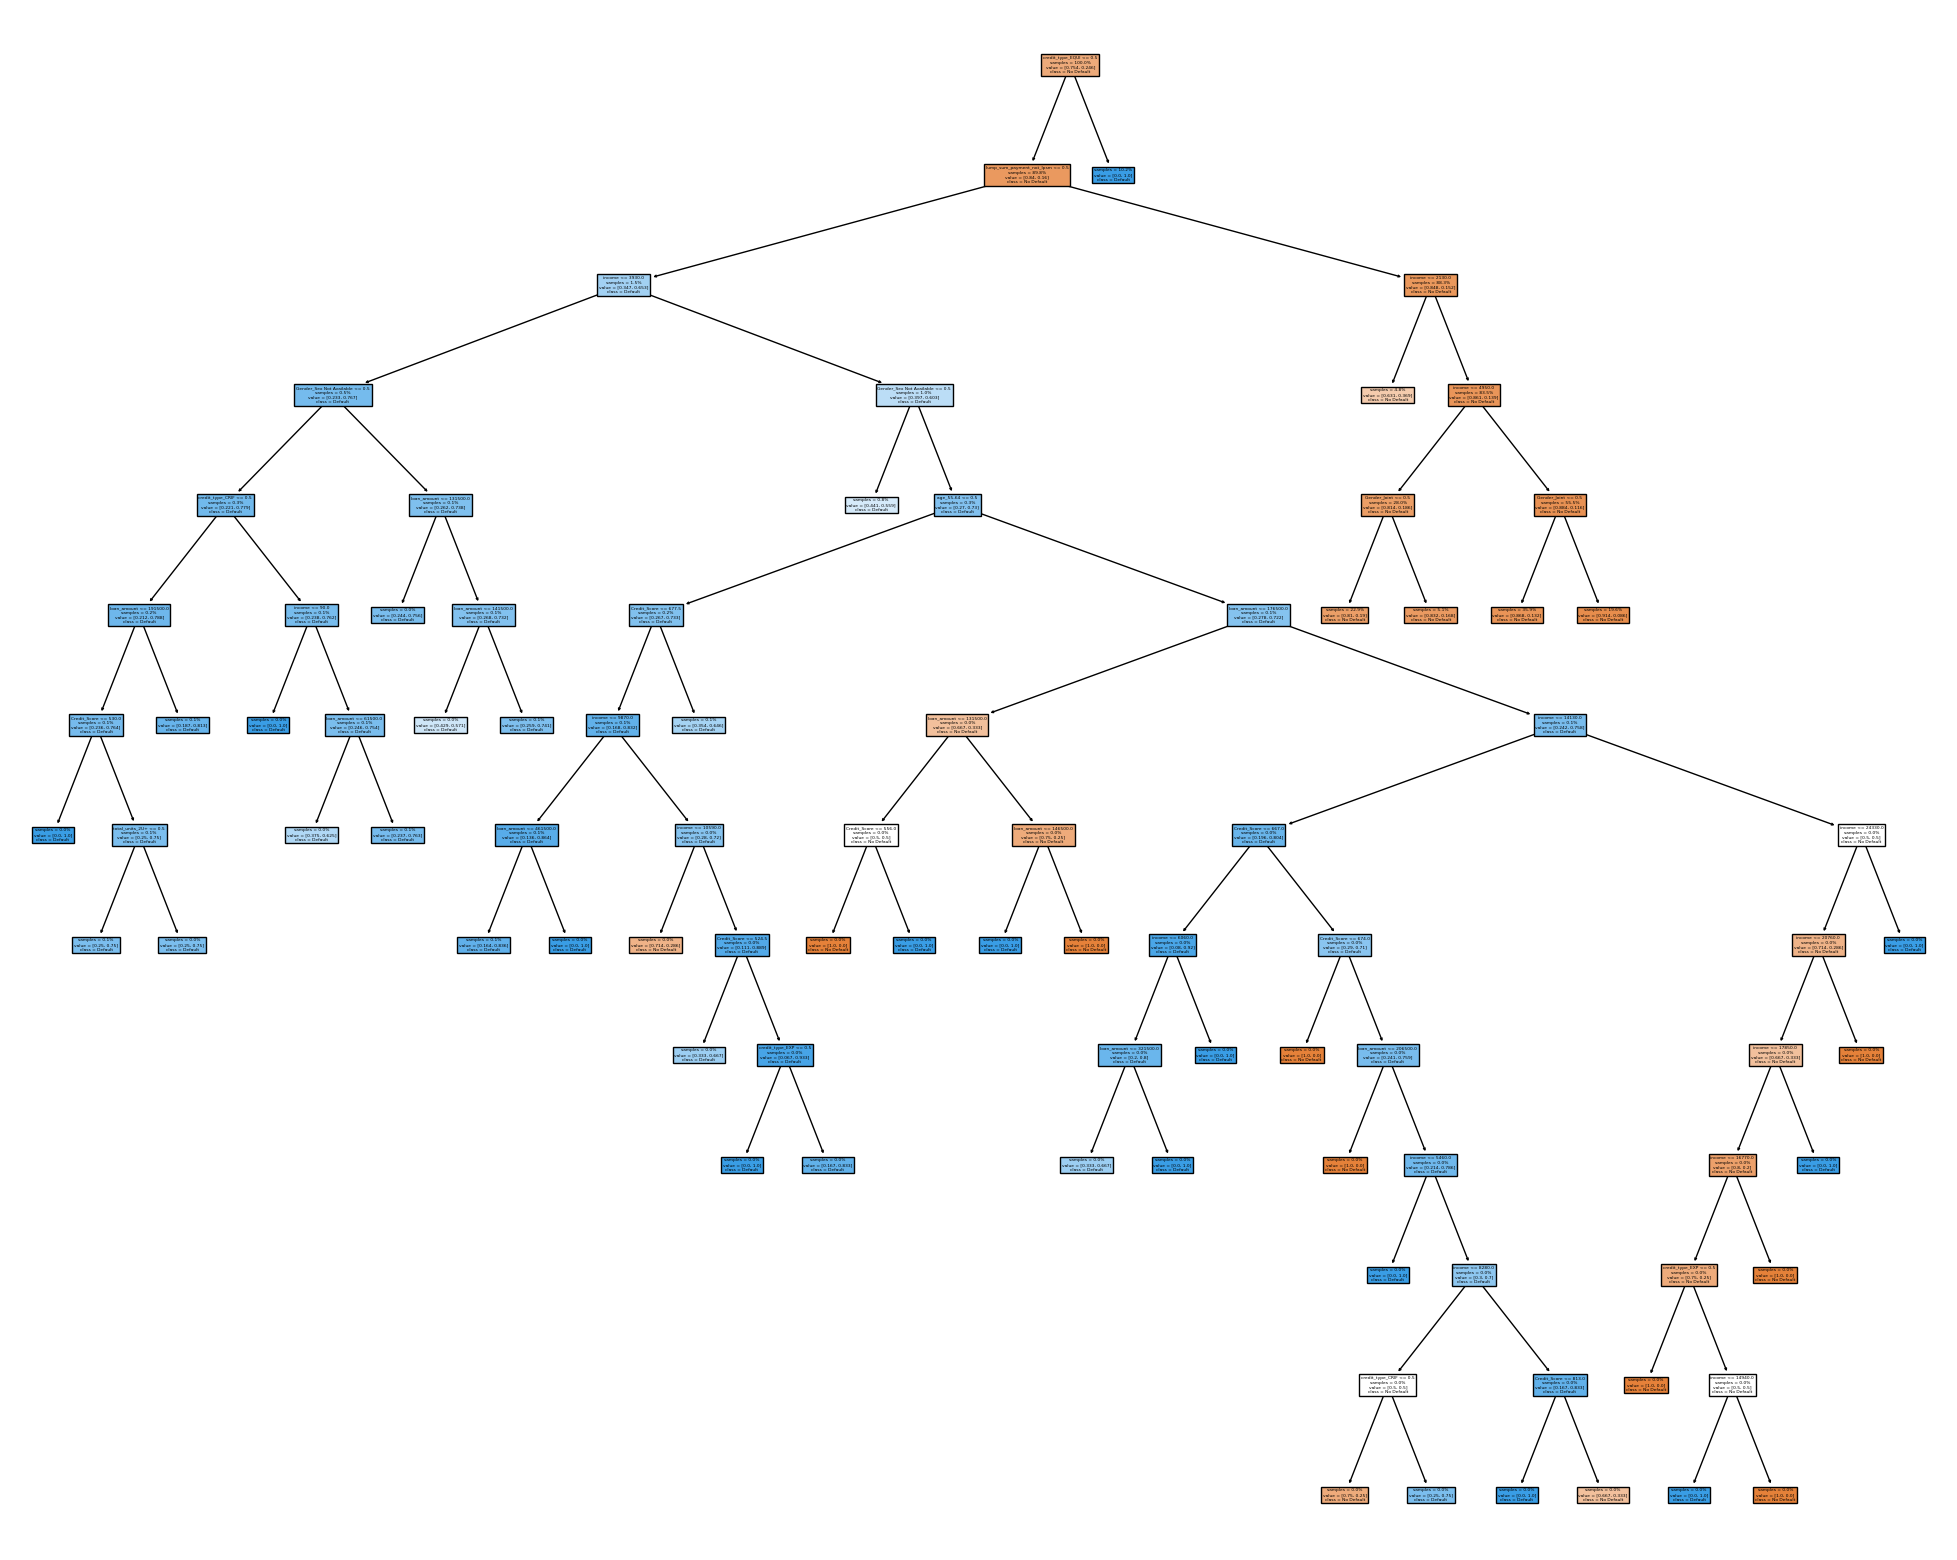

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))

plot_tree(
    dt,
    feature_names=list(X_train.columns),
    class_names=["No Default", "Default"],
    impurity=False,
    proportion=True,
    filled=True
);

In [ ]:
dt.feature_importances_

array([ 6.09833762e-03,             nan,  7.52006331e-04,             nan,
        0.00000000e+00,  9.55216428e-07,  0.00000000e+00,  0.00000000e+00,
        8.76687969e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.80352938e-02, -1.91332482e-05,  6.89256804e-02,             nan,
                   nan,  0.00000000e+00,  0.00000000e+00])

<Axes: ylabel='None'>

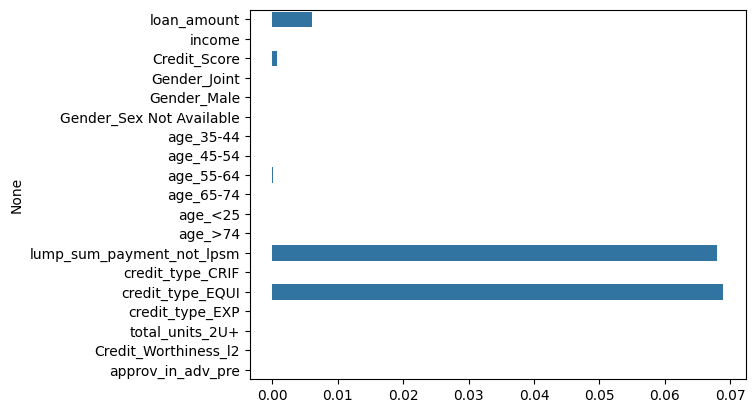

In [ ]:
sns.barplot(x=dt.feature_importances_, y=X.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [2, 5, 10, 20],
    "min_samples_leaf": [2, 5, 10, 20],
    "criterion":["entropy","gini","log_loss"]
}

grid = GridSearchCV(DecisionTreeClassifier(), params)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [ ]:
dt = DecisionTreeClassifier(**grid.best_params_)

dt.fit(X_train, y_train)

print(f"Train Accuracy: {round(dt.score(X_train, y_train), 3)}")
print(f"Test Accuracy: {round(dt.score(X_test, y_test), 3)}")

Train Accuracy: 0.845
Test Accuracy: 0.844
